<a href="https://colab.research.google.com/github/arturbernardo/no_estimate/blob/main/analise_noestmate_com_cauda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
%pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.2 MB/s eta 0:00:00


In [28]:
from faker import Faker

fake = Faker()

# Generate a single fake name
print(fake.name())

# Generate a list of fake names
n_names = 10
fake_names = [fake.name() for _ in range(n_names)]
print(fake_names)


# Generate a list of fake sentences (task titles)
n_titles = 10
fake_titles = [fake.sentence(nb_words=3) for _ in range(n_titles)]
print(fake_titles)

Linda Santos
['Scott Hooper', 'Erica Harrison', 'John Wyatt', 'Amy Fletcher', 'Ronald Weaver', 'Mr. Thomas Rodriguez', 'Shannon Poole', 'Willie Jacobson', 'Craig Wright', 'Steven Rodriguez']
['Relationship first describe.', 'Difficult wrong.', 'Tough enter.', 'Individual cell.', 'Region camera trade.', 'Tell environment take money.', 'Control bad.', 'Rate security.', 'Cost shake reality.', 'Science.']


,created,updated,name,completion_time
0,2023-04-13,2023-04-24,Institution town.,11
1,2023-12-15,2023-12-22,Since understand.,7
2,2023-09-28,2023-09-30,Society make size.,2
3,2023-04-17,2023-04-23,Check cover nor.,6
4,2023-03-13,2023-04-08,Congress impact behind.,26


Média original do tempo de conclusão: 8.12 dias
Intervalo 95% via Bootstrap (tempo de conclusão): [7.93, 8.30] dias


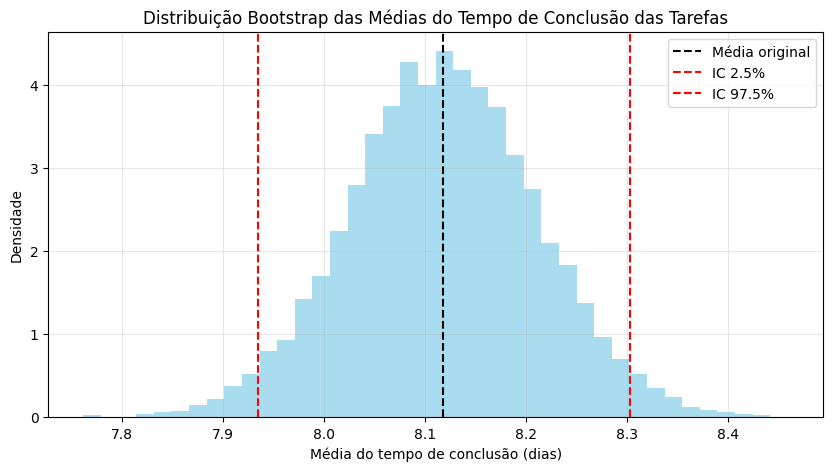

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
from faker import Faker # Import Faker

# -----------------------------
# 1. Generate synthetic data and save to CSV
# -----------------------------
np.random.seed(42)
fake = Faker()

n_rows = 3000
start_date = datetime(2023, 1, 1)

created_dates = [start_date + timedelta(days=int(d)) for d in np.random.randint(0, 365, n_rows)]
# created_dates_str = [d.strftime('%Y-%m-%d') for d in created_dates]

# Generate updated dates with varied completion times
updated_dates = []
for creation_date in created_dates:
    # Generate days to complete with desired distribution
    # Most tasks finish in 1-10 days, some up to 15, a few up to 30
    rand_val = np.random.rand()
    if rand_val < 0.7: # 70% finish within 1-10 days
        days_to_complete = np.random.randint(1, 11)
    elif rand_val < 0.95: # 25% finish within 11-15 days
        days_to_complete = np.random.randint(11, 16)
    else: # 5% finish within 16-30 days
        days_to_complete = np.random.randint(16, 31)

    updated_date = creation_date + timedelta(days=int(days_to_complete))
    updated_dates.append(updated_date.strftime('%Y-%m-%d'))

# Generate fake task titles using Faker sentence
task_names = [fake.sentence(nb_words=3) for _ in range(n_rows)]

df = pd.DataFrame({
    'created': created_dates,
    'updated': updated_dates,
    'name': task_names
})

df.to_csv('tasks.csv', index=False)

# -----------------------------
# 2. Load data from CSV and calculate completion time
# -----------------------------
df = pd.read_csv('tasks.csv')
df['created'] = pd.to_datetime(df['created'])
df['updated'] = pd.to_datetime(df['updated'])
df['completion_time'] = (df['updated'] - df['created']).dt.days

display(df.head()) # Display head of dataframe to show the new structure and completion time

# -----------------------------
# 3. Bootstrap Function
# -----------------------------
def bootstrap_mean(data, n_resamples=10_000):
    """Returns bootstrap samples and confidence intervals of the mean."""
    n = len(data)
    means = np.empty(n_resamples)

    for i in range(n_resamples):
        sample = np.random.choice(data, size=n, replace=True)
        means[i] = np.mean(sample)

    ci_low, ci_high = np.percentile(means, [2.5, 97.5])
    return means, ci_low, ci_high

# -----------------------------
# 4. Perform Bootstrap Analysis on Completion Time
# -----------------------------
task_data_for_bootstrap = df['completion_time']
bootstrap_means, ci_low, ci_high = bootstrap_mean(task_data_for_bootstrap)

print(f"Média original do tempo de conclusão: {np.mean(task_data_for_bootstrap):.2f} dias")
print(f"Intervalo 95% via Bootstrap (tempo de conclusão): [{ci_low:.2f}, {ci_high:.2f}] dias")

# -----------------------------
# 5. Visualize Results
# -----------------------------
plt.figure(figsize=(10, 5))
plt.hist(bootstrap_means, bins=40, density=True, alpha=0.7, color="skyblue")
plt.axvline(np.mean(task_data_for_bootstrap), color="black", linestyle="--", label="Média original")
plt.axvline(ci_low, color="red", linestyle="--", label="IC 2.5%")
plt.axvline(ci_high, color="red", linestyle="--", label="IC 97.5%")
plt.title("Distribuição Bootstrap das Médias do Tempo de Conclusão das Tarefas")
plt.xlabel("Média do tempo de conclusão (dias)")
plt.ylabel("Densidade")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Média original do tempo de conclusão (Amostra de 40 tarefas): 8.28 dias
Intervalo 95% via Bootstrap (Amostra de 40 tarefas): [6.83, 9.75] dias


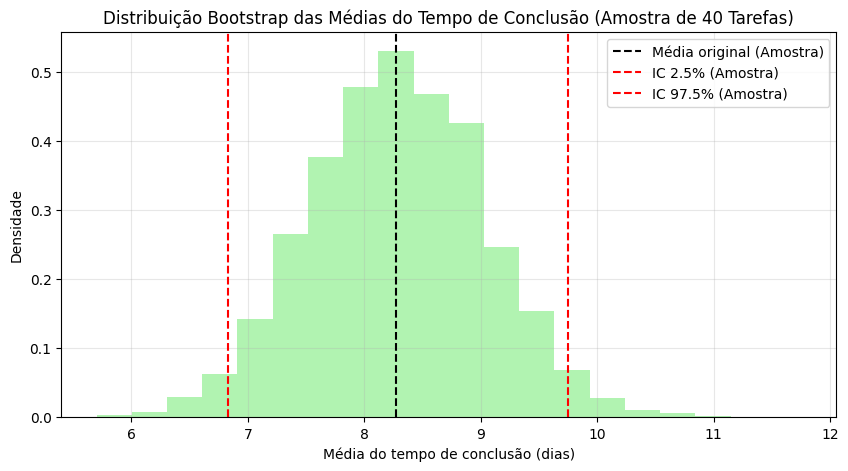

In [31]:
# Selecionar 40 tarefas aleatoriamente
# Para garantir que a seleção seja aleatória e representativa,
# você pode querer usar um método como sample do pandas.
# Se você tiver um critério específico para selecionar as 40 tarefas,
# ajuste o código de seleção aqui.

# Exemplo: selecionar 40 tarefas aleatórias
amostra_40_tarefas = df.sample(n=40, random_state=42) # Usando random_state para reprodutibilidade

# Extrair o tempo de conclusão para a amostra
tempo_conclusao_amostra = amostra_40_tarefas['completion_time']

# Realizar a análise Bootstrap na amostra de 40 tarefas
bootstrap_means_amostra, ci_low_amostra, ci_high_amostra = bootstrap_mean(tempo_conclusao_amostra)

# Imprimir os resultados para a amostra
print(f"\nMédia original do tempo de conclusão (Amostra de 40 tarefas): {np.mean(tempo_conclusao_amostra):.2f} dias")
print(f"Intervalo 95% via Bootstrap (Amostra de 40 tarefas): [{ci_low_amostra:.2f}, {ci_high_amostra:.2f}] dias")

# Opcional: Visualizar os resultados da amostra
plt.figure(figsize=(10, 5))
plt.hist(bootstrap_means_amostra, bins=20, density=True, alpha=0.7, color="lightgreen")
plt.axvline(np.mean(tempo_conclusao_amostra), color="black", linestyle="--", label="Média original (Amostra)")
plt.axvline(ci_low_amostra, color="red", linestyle="--", label="IC 2.5% (Amostra)")
plt.axvline(ci_high_amostra, color="red", linestyle="--", label="IC 97.5% (Amostra)")
plt.title("Distribuição Bootstrap das Médias do Tempo de Conclusão (Amostra de 40 Tarefas)")
plt.xlabel("Média do tempo de conclusão (dias)")
plt.ylabel("Densidade")
plt.legend()
plt.grid(alpha=0.3)
plt.show()